In [4]:
# DSBDA Assignment 4-1 - Visualization on Air Quality Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset
df = pd.read_csv('/content/AirQuality.csv', delimiter=';')

In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [7]:
# Rename columns if present (optional based on dataset)
df = df.rename(columns={'T': 'Temperature'})
df = df.rename(columns={'RH': 'Relative Humidity'})
df = df.rename(columns={'AH': 'Absolute Humidity'})

In [8]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative Humidity,Absolute Humidity,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [9]:
# Drop unnamed columns if present
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, errors='ignore')

In [10]:
df['CO(GT)'] = df['CO(GT)'].astype(str).str.replace(',', '.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].astype(str).str.replace(',', '.').astype(float)
df['Temperature'] = df['Temperature'].astype(str).str.replace(',', '.').astype(float)
df['Relative Humidity'] = df['Relative Humidity'].astype(str).str.replace(',', '.').astype(float)
df['Absolute Humidity'] = df['Absolute Humidity'].astype(str).str.replace(',', '.').astype(float)

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()

In [21]:
# Fill numeric NaNs with mean
df = df.fillna(df.mean(numeric_only=True))

In [22]:
# Drop remaining NaNs (from non-numeric columns)
df = df.dropna()

In [23]:
# Scale Absolute Humidity
df['Absolute Humidity'] = df['Absolute Humidity'].multiply(100)

In [25]:
# Remove outliers from selected columns
cols = ['Temperature', 'Relative Humidity', 'Absolute Humidity',
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)']
for col in cols:
    df[col] = remove_outliers(df[col])

In [26]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['yearr'] = df['Year'].astype(str)
df['month'] = df['Month'].astype(str)

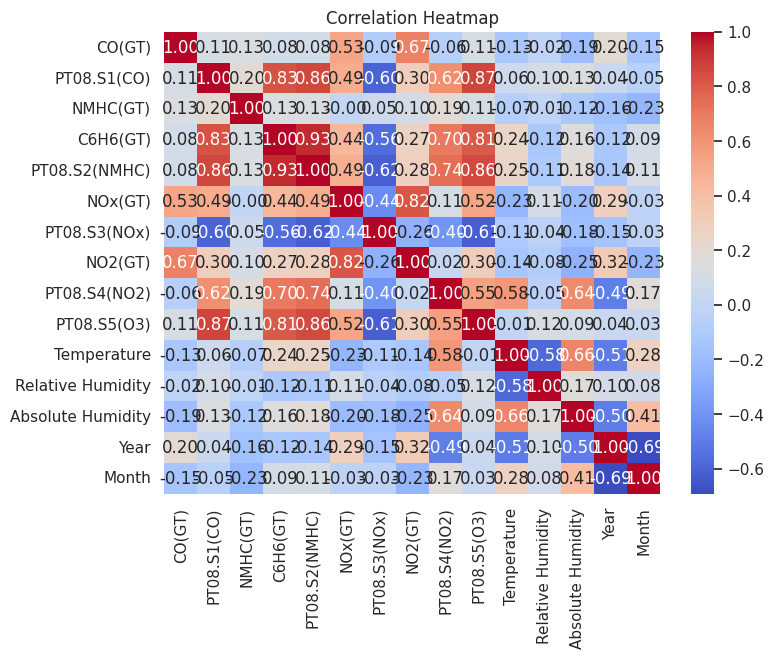

In [27]:
# 1. Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

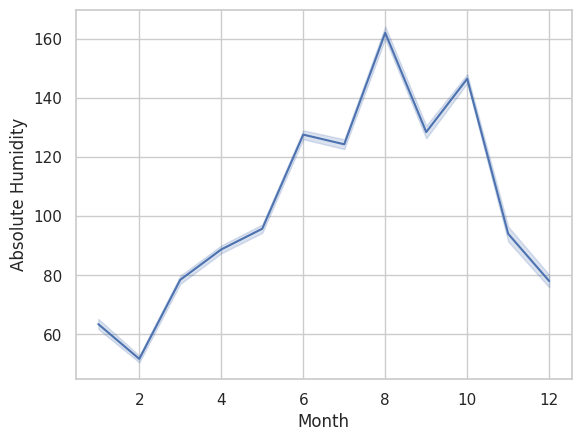

In [12]:
# 2. Line plots
sns.lineplot(df, x='Month', y='Absolute Humidity')
plt.show()

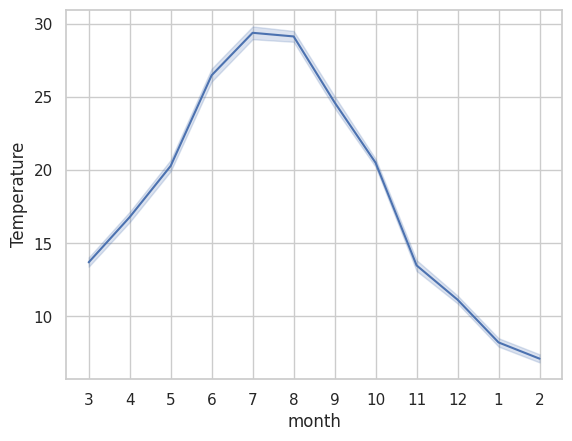

In [13]:
# 2. Line plots
sns.lineplot(df, x='month', y='Temperature')
plt.show()

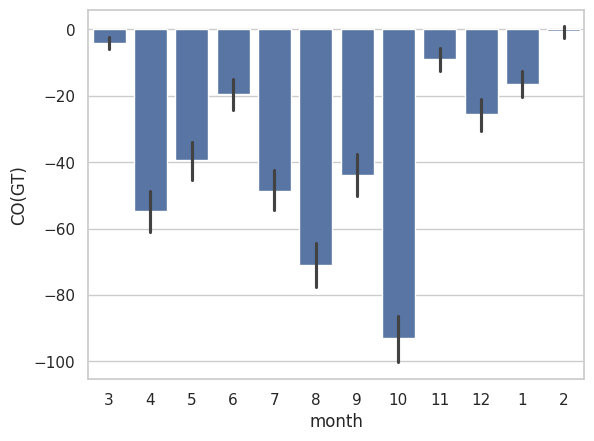

In [14]:
# 3. Bar plot
sns.barplot(df, x='month', y='CO(GT)')
plt.show()

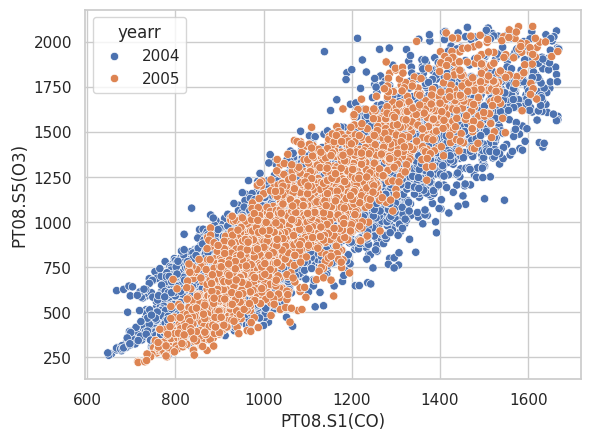

In [15]:
# 4. Scatter plot
sns.scatterplot(df, x='PT08.S1(CO)', y='PT08.S5(O3)', hue='yearr')
plt.show()

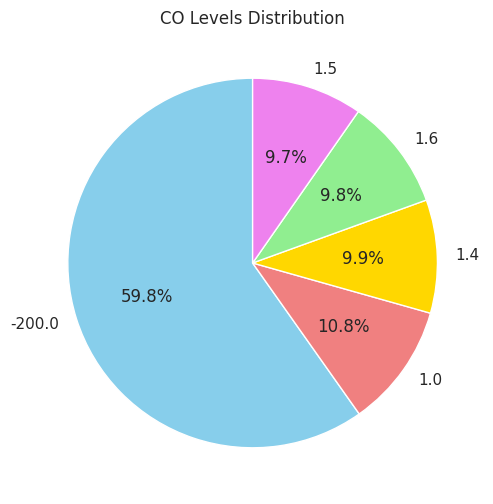

In [16]:
# 5. Pie chart
co_counts = df['CO(GT)'].value_counts().nlargest(5)
plt.figure(figsize=(6, 6))
co_counts.plot.pie(autopct='%1.1f%%', colors=["skyblue", "lightcoral", "gold", "lightgreen", "violet"], startangle=90)
plt.title("CO Levels Distribution")
plt.ylabel("")
plt.show()


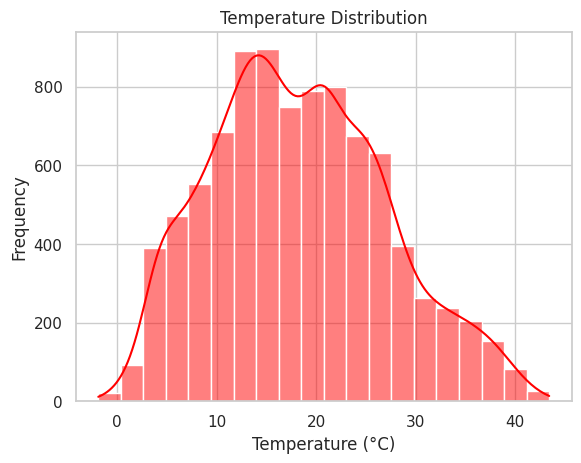

In [17]:
# 6. Histogram
sns.histplot(df['Temperature'], bins=20, kde=True, color='red')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

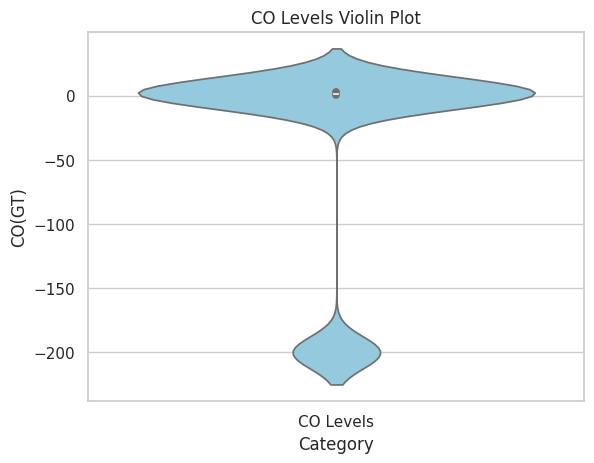

In [18]:
# 7. Violin plot
df["Category"] = "CO Levels"
sns.violinplot(x=df["Category"], y=df["CO(GT)"], color="skyblue")
plt.title("CO Levels Violin Plot")
plt.xlabel("Category")
plt.ylabel("CO(GT)")
plt.show()

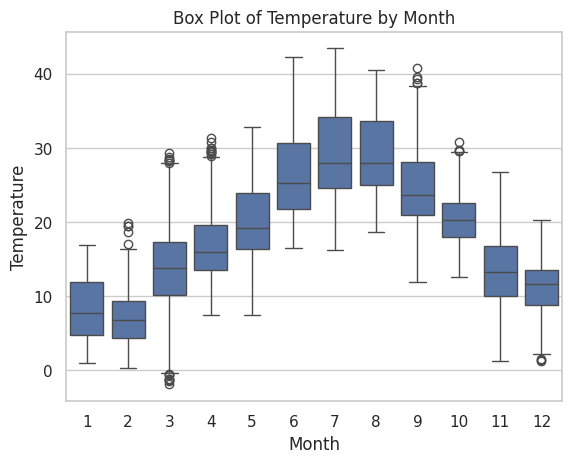

In [19]:
# 8. Box plot
sns.boxplot(data=df, x='Month', y='Temperature')
plt.title('Box Plot of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()